In [ ]:
using Pkg, Revise
gla_dir = "../GenLinAlgProblems"
Pkg.activate(gla_dir)
using GenLinAlgProblems, LinearAlgebra, RowEchelon, LaTeXStrings, Latexify;

<div style="float:center;width:100%;text-align:center;">
<strong style="height:100px;color:darkred;font-size:40px;">Some Uses of the Normal Equation</strong><br>
</div>

In [ ]:
html"<iframe width=\"400\" height=\"200\" src=\"https://www.youtube.com/embed/kDBzpkr3-yE\"  frameborder=\"0\" allow=\"accelerometer; clipboard-write; encrypted-media; gyroscope; picture-in-picture\" allowfullscreen></iframe>"

# 1. The Normal Equation (Reminder)

<div style="float:left;width:18cm;height:5.3cm;margin-top:1cm;background-color: transparent;border:1px solid black;">
<style type="text/css">
.tftable {font-size:12px;color:#333333;width:12cm;border-width: 1px;border-color: #729ea5;border-collapse: collapse;}
.tftable th {font-size:12px;background-color:#acc8cc;border-width: 1px;margin-top:1cm;padding: 8px;border-style: solid;border-color: #729ea5;text-align:left;}
.tftable tr {background-color:#ffffff;}
.tftable td {font-size:12px;border-width: 1px;padding: 8px;border-style: solid;border-color: #729ea5;}
</style>

<table class="tftable" border="1">
<tr><th style="width:5cm;">Equation</th><th style="width:5cm;">Orthogonal Projection</th><th>Comment</th></tr>
<tr><td>$x = \arg\min_x { \lVert b - A x \rVert }$</td><td>$b_\parallel=A x$</td><td>Minimize Distance to $\mathscr{C}(A)$</td></tr>
<tr><td>$A^t A x = A^t b$</td><td>$b_\parallel=A x$</td><td>Remove $\mathscr{N}(A^t)$ component from $b$</td></tr>
<tr><td>$x = \frac{a \cdot b}{a \cdot a}$</td><td>$b_\parallel=\frac{a \cdot b}{a \cdot a}\;a$</td><td>Column Vector Case $A = a$</td></tr>
<tr><td>$x_i = \frac{a_i \cdot b}{a_i \cdot a_i}$</td><td>$b_\parallel=\sum_i\frac{a_i \cdot b}{a_i \cdot a_i}\;a_i$</td><td>Orthogonal Vectors $a_i$ Case $A = a$</td></tr>
<tr><td>$x_i = q_i \cdot b$</td><td>$b_\parallel=\sum_i{q_i \cdot b\;q_i}$</td><td>Orthonormal Vectors $q_i$ Case</td></tr>
</table>
</div>
<img style="float:left;border:1px solid black;margin-left:1cm;" width=320 src="Figs/OrthoProjection_into_plane.png">

# 2. Orthogonal Projection Matrices

## 2.1 Theory

To **project a vector orthogonally onto a span of vectors** $S = span\{ a_1, a_2, \dots a_N \}$,<br>
$\quad\quad$ we can solve the normal equation $A^t A x = A^t b$, and compute $b_\parallel = A x$.

$\quad\quad$ The matrix $A$ has columns $ a_1, a_2, \dots a_N.$

##### **Remarks:**

* The normal equation can have an **infinite number of solutions $x$**<br>
  $\quad\quad$ $x = x_p + x_h$, where $x_h$ are the homogeneous solutions,<br>
  $\quad\quad$ but $\mathbf{b_\parallel = A (x_p + x_h ) = A x_p}$ **is unique.**

* Since $\mathscr{N}(A) = \mathscr{N}(A^t A)$,<br>
  $\quad\quad$ the normal equation has a<br>
  $\quad\quad$ **unique solution iff the vectors $a_i$ are linearly independent.**
  

* If the vectors $a_i, i=1,2, \dots N$ are linearly independent, $\mathbf{A^t A}$ **is invertible.**<br>
  Otherwise, we **can remove linearly dependent vectors from the $a_i$ until we have a basis for $S$.**

##### **Solution of the Normal Equation**

Assume $A$ of size $M \times N$ has full column rank, i.e., $rank(A) = N$.<br>
$\quad\quad$ so that matrix $A^t A$ is invertible.

$\quad\quad$ Solving $ A^t A x =\ A^t b  \Leftrightarrow \ x = \ (A^t A)^{-1}\ A^t\ b\;$ and computing $b_\parallel$ and $b_\perp$, we obtain

$\qquad\qquad
   \begin{align}
   & b_\parallel &=&\ \color{blue}{ A (A^t A)^{-1} A^t } \ b  &=&\ \color{blue}P\ b \\
   & b_\perp     &=&\ b - b_\parallel                         &=&\ \color{blue}{(I - P)}\ b,
   \end{align}
$

$\quad\quad$ where we have set $\qquad \color{blue}{P \;= A (A^t A)^{-1} A^t }$.

----
We see that
* **$P\quad\;\;$ projects the vector $b$ orthogonally onto the column space $\mathscr{C}(A)$**.
* **$I - P$ projects the vector $b$ orthogonally onto the orthogonal complement $\mathscr{C}^\perp(A) = \mathscr{N}(A^t)$**.

##### **Orthogonal Projection Matrices**

<div style="background-color:#F2F5A9;color:black;">

**Theorem:** Let $\{ a_1, a_2, \dots a_N \}$
be a set of linearly independent vectors.

$\quad\quad$ The **orthogonal projection matrix** onto the span of the vectors $a_i, i=1,2, \dots N$ is given by

$\qquad\qquad
P_\parallel = A \left( A^t A \right)^{-1} A^t
$

$\quad\quad$ The **orthogonal projection matrix** onto the orthogonal complement of the span of the vectors
$a_i, i=1,2, \dots N$ is given by

$\qquad\qquad
P_\perp = I - A \left( A^t A \right)^{-1} A^t
$

where the $a_i$ are the columns of $A = \left( a_1\ a_2\ \dots \ a_N \right).$
</div>

## 2.2 Example: Orthogonal Projection onto a Span of 3 Vectors

> Compute the orthogonal projection matrix onto
> $S = span \left\{\; a_1 = \left(\begin{array}{r} 1 \\  5 \\  1 \\  2 \end{array}\right),
a_2 = \left(\begin{array}{r} 3 \\ 3 \\ -1 \\ 2 \end{array}\right),
a_3 = \left(\begin{array}{r} 4 \\ 8 \\ 0 \\ 4 \end{array}\right)\;\right\},\quad$<br>
and use it to decompose
$\; b = \left(\begin{array}{r} 15\\ 23\\ -2\\ 9 \end{array}\right)$

##### **Step 1: Obtain a Normal Equation**

> **Since $a_3 = a_1 + a_2$, we can remove it.** The matrix $A = \left( a_1 \, a_2 \right)$ is full column rank.
>
> $\qquad A = \left(\begin{array}{rr}
 1 &  3  \\
 5 &  3 \\
 1 & -1 \\
 2 &  2 \\
 \end{array}\right) \Rightarrow
 A^t A = \begin{pmatrix}31 & 21 \\ 21 & 23 \end{pmatrix}\Leftrightarrow (A^t A)^{-1} =
 \frac{1}{272} \left(\begin{array}{rr} 23 & -21 \\ -21 & 31 \end{array}\right).
$

##### **Step 2: The Orthogonal Projection Matrices**

> The orthogonal projection matrix onto $S$ is given by<br><br>
> $\qquad P_\parallel =  A ( A^t A )^{-1} A^t = \frac{1}{272}\left(\begin{array}{rrrr}
  176 &  16 & -112 &  64 \\
   16 & 224 &   64 &  80 \\
 -112 &  64 &   96 & -16 \\
   64 &  80 &  -16 &  48 \\
\end{array}\right)
$

> The orthogonal projection matrix onto $S^\perp$ is given by<br><br>
> $\qquad P_\perp = I - P_\parallel = \frac{1}{272}
\left(\begin{array}{rrrr}
  96 & -16 & 112 & -64 \\
 -16 &  48 & -64 & -80 \\
 112 & -64 & 176 &  16 \\
 -64 & -80 &  16 & 224
 \end{array}\right)
$

##### **Step 3: Orthogonal Projection of $b$**

> $b_\parallel = P_\parallel\ b = \begin{pmatrix} 14 \\ 22 \\ -2 \\ 12 \end{pmatrix} \quad$ and
$\quad b_\perp     = P_\perp\ b      = \begin{pmatrix} 1 \\ 1 \\ 0 \\ -3 \end{pmatrix},$<br>
the same result we found previously when solving the normal equation directly.

## 2.3 Example: Orthogonal Projection onto a Line

The normal equation greatly simplifies for $A = ( a )$.<br>
We can exploit this
to obtain simpler formulae for the projection matrices:

##### **Example**

<div style="float:left;width:43%;border:1px solid black;">

$\quad$ **Remark:** Given a column vector $a,$ then

$\qquad\begin{align} & \left( a \cdot b \right) &= a^t b,\quad\text{so that} \\
& a\ (a \cdot b) &= a a^t \ b.\end{align}$

$\qquad \begin{align}
a \cdot a x = a \cdot b&\; \Leftrightarrow \; & x & & = \frac{1}{ \lVert a \rVert^2 } a \cdot b \\
                       &\; \Rightarrow \; & b_\parallel & = A x & = \color{red}{\frac{1}{ \lVert a \rVert^2 } a a^t}\ b  \\
                       &                  &                   & = \color{red}{P_\parallel}\ b
\end{align}
$
</div>
<img src="Figs/NormalProjOntoLine.svg" width=320 style="float:left;margin-left:1cm;margin-right:1cm;">
<div style="float:left;width:6cm;height:4.8cm;border:1px solid black;">

$\quad$ **Alternate derivation**
$$\begin{align}
P_\parallel =&\ a (a^t a)^{-1} a^t \\
            =&\ a \left( \frac{1}{a \cdot a} I_{1 \times 1}\right) a^t \\
            =&\ \frac{1}{a \cdot a} a a^t.
\end{align}$$
</div>

> Let $\quad a = \begin{pmatrix} 3 \\ 4 \\ 0 \end{pmatrix}, \quad b =  \begin{pmatrix} 0 \\ 5 \\ 2 \end{pmatrix}.$
>
> $\qquad
P_\parallel = {\color{red}{ \frac{1}{25} \begin{pmatrix} 3 \\ 4 \\ 0 \end{pmatrix} \begin{pmatrix} 3 & 4 & 0 \end{pmatrix}}}
            =  \frac{1}{25} \begin{pmatrix} 9 & 12 & 0 \\ 12 & 16 & 0 \\ 0 & 0 & 0 \end{pmatrix}, \quad\quad
P_\perp = I - P_\parallel = \frac{1}{25} \begin{pmatrix} 16 & -12 & 0 \\ -12 & 9 & 0 \\ 0 & 0 & 25 \end{pmatrix}
$

> $\qquad b_\parallel = P_\parallel b = \frac{1}{5} \begin{pmatrix} 12 \\ 16\\ 0 \end{pmatrix},\quad\quad
b_\perp = P_\perp b = \frac{1}{5} \left(\begin{array}{r} -12 \\ 9 \\ 2 \end{array}\right)
$

## 2.4 Projection onto an Orthogonal Basis

For mutually orthogonal non-zero vectors $a_i, i=1,\dots N$, the normal equations reduce to

$\qquad
A^t A x = A^t b \Leftrightarrow x = (A^tA)^{-1} A^t b,
$

where

$\qquad
(A^t A)^{-1} = \begin{pmatrix} \frac{1}{a_1 \cdot a_1} & 0                   & \dots & 0 \\
                    0                   & \frac{1}{a_2 \cdot a_2} & \dots & 0 \\
                    \                   &     \               &  \    & 0 \\
                    0                   & 0                   & \dots & \frac{1}{a_N \cdot a_N} \end{pmatrix} \quad
\Rightarrow \color{red}{ P_\parallel = A (A^t A)^{-1} A^t =\sum_{i=1}^N {\frac{1}{ a_i \cdot a_i } a_i a_i^t} }.
$

<div style="background-color:#F2F5A9;color:black;padding-bottom:0.3cm;">

**Remark:** For mutually orthogonal non-zero vectors $a_i, i=1,\dots N$, the projection matrix $P_\parallel$ reduces to

$\qquad
P_\parallel = P_{1 \parallel} +  P_{2 \parallel} + \dots P_{N \parallel}, \quad\text{ where }\quad
P_{i \parallel} = \frac{1}{a_i \cdot a_i} a_i a_i^t.
$
</div>

##### **Example**

> $\qquad a_1 = \left(\begin{array}{r} -4\\ -8\\  1 \end{array}\right), \;
  a_2 = \left(\begin{array}{r}  7\\ -4\\ -4 \end{array}\right), \;
  a_3 = \left(\begin{array}{r}  4\\ -1\\  8 \end{array}\right) \quad \Rightarrow \quad
 \left\{ \begin{align}  a_1 \cdot a_1 =  81, &\quad a_2 \cdot a_2 =  81, \quad a_3 \cdot a_3 = 81, \\
                        a_1 \cdot a_2 = \;0, &\quad a_1 \cdot a_3 = \;0, \quad\; a_2 \cdot a_3 = \;0. \end{align} \right.
$

> $\qquad
P_{1 \parallel} = \frac{1}{81} \left(\begin{array}{rrr}  16 & -28 & -16\\ -28 &  49 &  28 \\ -16 &  28 &  16\end{array}\right), \quad
P_{2 \parallel} = \frac{1}{81} \left(\begin{array}{rrr}   64 & 32 & 8 \\  32 & 16 & 4\\  8 & 4 & 1\\ \end{array}\right), \quad
P_{3 \parallel} = \frac{1}{81} \left(\begin{array}{rrr}   1 & -4 & 8 \\  -4 & 16 & -32\\  8 & -32 & 64\\ \end{array}\right).
$

> The orthogonal projection matrix onto the $\text{ span}\{ a_1, a_2 \}$ is therefore given by<br><br>
> $\qquad
P_{1 2 \parallel} = P_{1 \parallel} + P_{2 \parallel}=
\frac{1}{81} \left(\begin{array}{rrr} 80 & 4 & -8 \\
  4 & 65 & 32 \\
 -8 & 32 & 17 \end{array}\right).
$

# 3. Orthonormal Bases

## 3.1 Example

> Let $a_1 = \frac{1}{5} \begin{pmatrix}  3 \\ 4 \\ 0\end{pmatrix},
    \ a_2 = \frac{1}{5} \left(\begin{array}{r} -4 \\ 3 \\ 0\end{array}\right),
    \ a_3 =             \begin{pmatrix}  0 \\ 0 \\ 1\end{pmatrix}.$

> Verify that these vectors form an orthonormal set:<br><br>
> $A = \left( a_1 \ a_2 \ a_3 \right) \ = \frac{1}{5} \left(\begin{array}{rrr} 3 & -4 & 0 \\ 4 & 3 & 0 \\ 0 & 0 & 5 \end{array}\right)
\Rightarrow A^t A = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix}.$

>
> * **Since $A$ is square, we see that $A^{-1} = A^t$**
> * The vectors $a_1, a_2, a_3$ form an orthonormal basis for $\mathbb{R}^3$

## 3.2 Orthogonal Matrices

<div style="float:left;width:50%;height:2.5cm;padding:5px;background-color:#F2F5A9;color:black;">

**Definition:** A matrix $A$ is **orthogonal** iff $A^t = A^{-1}.$
    
**Definition:** A matrix $A$ is **unitary** iff $A^H = A^{-1}.$<br>
$\quad\quad$ (The **hermitian transpose** $A^H$ is the complex conjugate of $A^t.$)

</div>
<div style="float:right;margin:10px;width:40%height:2.5cm;">

$\;\;$ **Remark:** Therefore the matrix $A$ is square,<br>$\quad\quad$ and the columns of $A$ are mutually orthogonal and unit length.
</div>

##### **Important Properties of Orthogonal and Unitary Matrices**

>Applying orthogonal and unitary matrices to a vector **does not change the length of a vector,**<br>
and does not change the angle between vectors:<br><br>
**Computations involving orthogonal vectors will not overflow!**

<div style="background-color:#F2F5A9;color:black;">

**Theorem:** Let $Q$ be an orthogonal (or a unitary) matrix, and let $x$ and $y$ be vectors of consistent length
* $\lVert Q x \rVert =  \lVert x \rVert, \quad\quad\quad\;$ **lengths are conserved**
*  $(Q x) \cdot (Q y) = x \cdot y,\quad$ **angles are conserved**
*  $Q x \perp Q y \Leftrightarrow x \perp y, \quad$ in particular, **orthogonal angles are conserved.**
    </div>

##### **Example**

> Consider $\quad$ $Q = \frac{1}{2}\left(\begin{array}{rr} 1 & 1 \\ 1 & 1 \\ 1 & -1 \\ 1& -1 \end{array}\right),\quad$ and
>  $\quad$ $x = \begin{pmatrix} 1 \\ 2 \end{pmatrix}, y= \left(\begin{array}{r} -2\\1 \end{array}\right)$

<div style="float:left;width:50%;">

> $Q^t Q = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix},$ $\quad$ so $Q$ has orthonormal columns.
>
> $Q$ is not square: it does not have an inverse.
>
> $Q Q^t = \frac{1}{2}\left(\begin{array}{rrrr}
1 & 1 & 0 & 0 \\
1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 \\
0 & 0 & 1 & 1
\end{array}\right) .
$
</div><div style="float:left;width:40%">

> $x \cdot y = 0 \Rightarrow x \perp y$
>
> $\lVert x \rVert = \sqrt{5},$ <br>
> $Q x = \frac{1}{2} \left(\begin{array}{r} 3 \\ 3 \\ -1 \\ -1 \end{array}\right) \Rightarrow \lVert Q x \rVert = \sqrt{5}$

> $(Q x) \cdot (Q y) =
 \frac{1}{2} \left(\begin{array}{r} 3 \\ 3 \\ -1 \\ -1 \end{array}\right) \cdot
 \frac{-1}{2} \begin{pmatrix} 1 \\ 1 \\ 3 \\ 3 \end{pmatrix} = 0$
</div>

> If we augment $Q$ with an orthonormal basis of $\mathscr{N}(Q^t)$<br>
> $ \tilde{Q} = \frac{1}{2}\left(\begin{array}{rrrr} 1 &  1 &  1 &  0 \\
                                          1 &  1 & -1 &  0 \\
                                          1 & -1 &  0 &  1 \\
                                          1 & -1 &  0 & -1 \end{array}\right), \quad
$ then $\quad \tilde{Q} \tilde{Q}^t = I, \quad\tilde{Q}^t \tilde{Q} = I, \quad$ and therefore $\quad Q^{-1} = Q^t.$

## 3.3 (Extra Material) A Naive Construction Method for Orthogonal Matrices

Can we find sets of mutually orthogonal vectors?

One way to do this is to use the fundamental theorem of linear algebra:<br>
The span of the columns of a matrix $A$ is orthogonal to the null space $\mathscr{N}(A^t)$

We can proceed one vector at a time:
* starting with a single vector $v_1$, set $A=(v_1)$ and use GE on $(A I)$ to find a vector $v_2 \in \mathscr{N}(A^t)$
* set $A=(v_1\; v_2)$ and use GE on $(A I)$ to find a vector $v_3 \in \mathscr{N}(A^t)$
* set $A=(v_1\; v_2\; v_3)$ and use GE $\dots$
We will have constructed a set of mutually orthogonal vectors

**Remark:** this method works well in exact arithmetic. It is not useful for actual computations (**see Gramm-Schmidt for a better method**)

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:12pt;\">An Example of Mutually Orthogonal Vectors</p>\n</div>")

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:10pt;\">first vector</p>\n</div>")

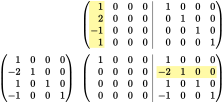

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:10pt;\">add in second vector, complete GE for this vector and the right hand side (nothing else changes)</p>\n</div>")

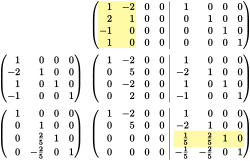

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:10pt;\">add in the third vector, complete GE for this vector and the right hand side (nothing else changes)</p>\n</div>")

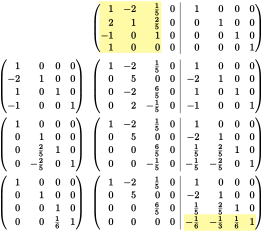

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:10pt;\">add in the last vector, no more computation required</p>\n</div>")

L"\begin{equation}
\left[
\begin{array}{cccc}
1 & -2 & \frac{1}{5} & \frac{-1}{6} \\
2 & 1 & \frac{2}{5} & \frac{-1}{3} \\
-1 & 0 & 1 & \frac{1}{6} \\
1 & 0 & 0 & 1 \\
\end{array}
\right]
\end{equation}
"

In [13]:
pr("An Example of Mutually Orthogonal Vectors", sz=12)
v  = [1//1; 2; -1; 1]
A  = [v zeros(Int64,4,3) Matrix(1I,4,4)]
E1 = [1 0 0 0; -2 1 0 0; 1 0 1 0; -1 0 0 1] ; A1 = E1*A
pr("first vector", sz=10)
h1,_ = nM.ge( to_latex([[:none, A], [E1, A1]]), formater=x->x, Nrhs=4,
              bg_for_entries = [[0, 1, [[(0, 0), (3, 0)] ], "yellow!35", 1],
                                [1, 1, [[(1, 4), (1, 7)] ], "yellow!35", 1]
                            ],
              tmp_dir="../tmp")
display(h1)

A[:,2]=A1[2,5:end]; A1=E1*A
E2 = [1//1 0 0 0; 0 1 0 0; 0 2//5 1 0; 0 -2//5 0 1] ; A2 = E2*A1
pr("add in second vector, complete GE for this vector and the right hand side (nothing else changes)", sz=10)
h2,_= nM.ge( to_latex([[:None, A], [E1, A1], [ E2, A2]]), formater=x->x, Nrhs=4,
             bg_for_entries = [[0, 1, [[(0, 0), (3, 1)] ], "yellow!35", 1],
                               [2, 1, [[(2, 4), (2, 7)] ], "yellow!35", 1]
                            ],
             tmp_dir="../tmp")
display(h2)

A[:,3]=A2[3,5:end]; A1=E1*A; A2=E2*A1
E3 = [1//1 0 0 0; 0 1 0 0; 0 0 1 0; 0 0 1//6 1] ; A3 = E3*A2

pr("add in the third vector, complete GE for this vector and the right hand side (nothing else changes)", sz=10)
h3,_ = nM.ge( to_latex([[:None, A], [E1, A1], [E2, A2], [E3, A3]]), formater=x->x, Nrhs=4,
             bg_for_entries = [[0, 1, [[(0, 0), (3, 2)] ], "yellow!35", 1],
                               [3, 1, [[(3, 4), (3, 7)] ], "yellow!35", 1]
                            ],
              tmp_dir="../tmp")
display(h3)
pr("add in the last vector, no more computation required", sz=10)
A     =  A[:,1:4]
A[:,4] = A3[4,5:end]
latexify(A)

In [12]:
pr("Check that the columns of the resulting matrix are orthogonal", sz=10)
latexify([latex("A^tA \\text{ is diagonal: }"), A'A]')

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:10pt;\">Check that the columns of the resulting matrix are orthogonal</p>\n</div>")

L"\begin{equation}
\left[
\begin{array}{cc}
A^tA \text{ is diagonal: } & \left[
\begin{array}{cccc}
7 & 0 & 0 & 0 \\
0 & 5 & 0 & 0 \\
0 & 0 & \frac{6}{5} & 0 \\
0 & 0 & 0 & \frac{7}{6} \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

<div style="background-color:#F2F5A9;color:black;">

**Definition:**<br>
$\qquad$ An **orthogonal matrix** is a square matrices $Q$ with *orthonormal* columns: $Q^t Q = I$.<br>
$\qquad$ A **unitary matrix** is a square matrix $Q$ such that $Q^H Q = I.$ ($Q^H$ is the conjugate transpose of $Q$, aka the **hermitian transpose**.)
</div>

**Remarks:**
* Since $Q$ is square and $Q^t Q = I$, we have $Q^{-1} = Q^t$
* the matrix $Q$ must be square. Otherwise $Q^t$ is a left inverse only!

### 3.1.3 Two Important Examples

<div style="background-color:#F2F5A9;color:black;">

* A useful example of orthogonal matrices is the **Haar matrix** (wavelets).<br> See [wikipedia](https://en.wikipedia.org/wiki/Haar_wavelet) and [ThreeBasesExample.ipynb](ThreeBasesExample.ipynb)
* A useful example of a unitary matrix is the **Discrete Fourier Transform (DFT) matrix**.<br> See [wikipedia](https://en.wikipedia.org/wiki/DFT_matrix) and [FourierMatrix.ipynb](FourierMatrix.ipynb)
</div>

## 3.4 Gramm-Schmidt Orthogonalization

##### **The Problem**

As we saw, **orthogonal basis vectors are really nice:**
just think $\{ i, j, k \}$ in $\mathbb{R}^3.$

> Given a set of basis vectors for a hyperplane in $\mathbb{R}^N$,<br>
we would like to construct an **orthogonal basis** for this hyperplane.<br>
Better yet, we would like to construct an **orthonormal basis** for this hyperplane.

##### **The Idea**

<div style="float:left;width:12cm;">

**Idea:** Decompose **each vector in turn** by projecting it onto the span<br>$\quad\quad$ of the previous set of vectors,<br>
$\quad\quad$ **keeping only the orthogonal component.**

---
* $\color{blue}{w_1 = v_1},$<br> so $span\{w_1\} = span\{v_1\},\quad\quad\quad\quad\quad\quad$ i.e., the blue line.

* $\color{magenta}{w_2 = v_2 - Proj^\perp_{span\{ v_1 \}}\; v_2},$<br>
    so $span\{ v_1, v_2 \} = span\{w_1, w_2\},\quad\quad\quad\;$ i.e., the plane.

* $\color{brown}{w_3 = v_3 - Proj^\perp_{span\{ v_1, v_2 \}}\; v_3},$<br>
    so $span\{ v_1, v_2, v_3 \} = span\{w_1, w_2, w_3\},\quad$ i.e., 3 space.

</div>
<div style="float:left;padding-left:1cm;">
<img src="Figs/GramSchmidt.png" style="float:left;border:1px solid black;margin-left:3cm;" width=425>
</div>

##### **Refinement**

<div style="float:left;width:60%;background-color:#F2F5A9;color:black;">

**The Gram-Schmidt Procedure**

$\qquad
\begin{align}
w_1 & = {\color{red}{v_1}} && \\
w_2 & = {\color{red}{v_2}} - Proj^\perp_{ span\{ w_1      \} } \; {\color{red}{v_2}} &=&\ {\color{red}{v_2}} - \frac{{\color{red}{v_2}} \cdot w_1}{w_1 \cdot w_1} w_1\\
w_3 & = {\color{red}{v_3}} - Proj^\perp_{ span\{ w_1, w_2 \} } \; {\color{red}{v_3}} & =&\ {\color{red}{v_3}} - \frac{{\color{red}{v_3}} \cdot w_1}{w_1 \cdot w_1} w_1
                                                                 - \frac{{\color{red}{v_3}} \cdot w_2}{w_2 \cdot w_2} w_2 \\
 \dots& \dots\dots\dots\dots\dots\dots & &\dots\dots\dots\dots\dots\dots\dots \\
w_k & = {\color{red}{v_k}} - Proj^\perp_{ span\{ w_1, w_2, \dots w_{k-1} \} } \; \color{red}{v_k} & =&\
{\color{red}{v_k}} - \frac{{\color{red}{v_k}} \cdot w_1}{w_1 \cdot w_1} w_1
                   - \frac{{\color{red}{v_k}} \cdot w_2}{w_2 \cdot w_2} w_2 - \ \dots \ 
                    - \frac{{\color{red}{v_k}} \cdot w_{k-1}}{w_{k-1} \cdot w_{k-1}} w_{k-1} \\
\end{align}
$
</div><div style="float:right;width:35%;padding-top:1cm;">

**Use the $w_i$ vectors to compute the projections,**<br>
$\quad\quad$ rather than the $v_i$ vectors.<br><br>$\quad\quad$ **They are orthogonal!**
</div>

We complete the procedure by making the vectors **unit length:**<br><br>
<div style="float:left;width:14cm;background-color:#F2F5A9;color:black;">
<br>
$\;\; q_i = \frac{1}{\lVert w_i \rVert } w_i, \; 1=1,2, \dots k. $
<br><br>
</div>

##### **Example**

Consider $v_1 = \begin{pmatrix}1 \\ 0 \\ 1 \\ 1 \end{pmatrix},
v_2 =  \begin{pmatrix}0 \\ 1 \\ 0 \\ 1 \end{pmatrix},\; \text{ and }\;
v_3 = \left(\begin{array}{r} -1 \\ 1 \\ -1 \\ 1 \end{array}\right).
$

##### $\mathbf{w_1, q_1}$

$\qquad w_1 = v_1 = \begin{pmatrix} 1\\ 0 \\ 1 \\ 1 \end{pmatrix},\quad w_1\cdot w_1 = 3, \quad q_1 = \frac{1}{\sqrt{3}}\begin{pmatrix} 1 \\ 0 \\ 1 \\ 1 \end{pmatrix}$

##### $\mathbf{w_2, q_2}$

$\quad w_2 = v_2 - \frac{v_2\cdot w_1}{w_1 \cdot w_1}\ w_1 \;
     = \; \begin{pmatrix} 0 \\ 1 \\ 0 \\ 1 \end{pmatrix}
        - \frac{1}{3} \left(\begin{array}{r} 1 \\ 0 \\ 1 \\ 1 \end{array}\right)
     = \quad \frac{1}{3} \left(\begin{array}{r} -1\\ 3\\ -1 \\ 2 \end{array}\right), \quad\quad w_2 \cdot w_2 = \frac{5}{3},
     \quad q_2 = \frac{1}{\sqrt{15}} \left(\begin{array}{r} -1 \\ 3 \\ -1 \\ 2 \end{array}\right)
$

##### $\mathbf{w_3,q_3}$

$\qquad\begin{align}
&w_3 &=&\; v_3 - \frac{v_3\cdot w_1}{w_1 \cdot w_1} \ w_1 - \frac{v_3\cdot w_2}{w_2 \cdot w_2} \ w_2 \\
&    &=&\;  \left(\begin{array}{r} -1 \\ 1 \\ -1 \\ 1 \end{array}\right)
        - \frac{-1}{3} \left(\begin{array}{r} 1 \\ 0 \\ 1 \\ 1 \end{array}\right)
        - \frac{7}{5} \left(\begin{array}{r} -1 \\ -3 \\ -1 \\ 2 \end{array}\right)
     = \quad \frac{1}{5} \left(\begin{array}{r} -1\\ -2\\ -1 \\ 2 \end{array}\right), \quad\quad w_3 \cdot w_3 =\; \frac{2}{5}, \quad\quad q_3 =\;
             \frac{1}{\sqrt{10}} \left(\begin{array}{r} -1 \\ -2 \\ -1 \\ 2 \end{array}\right)
\end{align}
$


# 4. Take Away

## 4.1 Projection Matrices

<div style="float:left;width:18cm;height:5.2cm;margin-top:1cm;background-color: transparent;border:1px solid black;">
<style type="text/css">
.tftable {font-size:12px;color:#333333;width:12cm;border-width: 1px;border-color: #729ea5;border-collapse: collapse;}
.tftable th {font-size:12px;background-color:#acc8cc;border-width: 1px;padding: 8px;border-style: solid;border-color: #729ea5;text-align:left;}
.tftable tr {background-color:#ffffff;}
.tftable td {font-size:12px;border-width: 1px;padding: 8px;border-style: solid;border-color: #729ea5;}
</style>

<table class="tftable" border="1">
<tr><th style="width:5cm;">Orthogonal Projection Matrix</th><th>Comment</th></tr>
<tr><td>$P_\parallel = A ( A^t A )^{-1} A^t$</td><td>Assuming $A^t A$ is invertible</td></tr>
<tr><td>$P_\parallel = \frac{1}{a \cdot a} a a^t$</td><td>Column Vector Case: $A = a$</td></tr>
<tr><td>$P_{\parallel} = \sum_{i}{\frac{1}{a_i \cdot a_i} a_i a^t_i}$</td><td>Orthogonal Vectors $a_i$ Case: $A = ( a_1\ a_2 \dots )$ </td></tr>
<tr><td>$P_{\parallel} = \sum_{i}{q_i q^t_i}$<td>Orthonormal Vectors $q_i$ Case: $A = ( q_1\ q_2 \dots )$</td></tr>
</table>
</div>
<img style="float:left;border:1px solid black;margin-left:2cm;" width=320 src="Figs/OrthoProjection_into_plane.png">

## 4.2 The Gram Schmidt Procedure

<div style="float:left;width:80%;background-color:#F2F5A9;color:black;">

**The Gram-Schmidt Procedure**

$\qquad
\begin{align}
w_1 & = {\color{red}{v_1}} &&  & \quad q_1 = \frac{1}{\lVert w_1 \rVert} w_1 \\
w_2 & = {\color{red}{v_2}} - Proj^\perp_{ span\{ w_1      \} } \; {\color{red}{v_2}} &=&\ {\color{red}{v_2}} - \frac{{\color{red}{v_2}} \cdot w_1}{w_1 \cdot w_1} w_1  & \quad q_2 = \frac{1}{\lVert w_2 \rVert} w_2 \\
w_3 & = {\color{red}{v_3}} - Proj^\perp_{ span\{ w_1, w_2 \} } \; {\color{red}{v_3}} & =&\ {\color{red}{v_3}} - \frac{{\color{red}{v_3}} \cdot w_1}{w_1 \cdot w_1} w_1
                                                                 - \frac{{\color{red}{v_3}} \cdot w_2}{w_2 \cdot w_2} w_2  & \quad q_3 = \frac{1}{\lVert w_3 \rVert} w_3 \\
 \dots& \dots\dots\dots\dots\dots\dots & &\dots\dots\dots\dots\dots\dots\dots & \\
w_k & = {\color{red}{v_k}} - Proj^\perp_{ span\{ w_1, w_2, \dots w_{k-1} \} } \; \color{red}{v_k} & =&\
{\color{red}{v_k}} - \frac{{\color{red}{v_k}} \cdot w_1}{w_1 \cdot w_1} w_1
                   - \frac{{\color{red}{v_k}} \cdot w_2}{w_2 \cdot w_2} w_2 - \ \dots \ -
                     \frac{{\color{red}{v_k}} \cdot w_{k-1}}{w_{k-1} \cdot w_{k-1}} w_{k-1}  \quad & \quad q_k = \frac{1}{\lVert w_k \rVert} w_k \\
\end{align}
$
</div>